# **1.2 Lengths and Dot Products**

### **Dot Product (Inner Product)**

The **dot product** of vectors **v = (v₁, v₂)** and **w = (w₁, w₂)** is a number:

$$
v \cdot w = v₁w₁ + v₂w₂
$$

**Example 1:**

- Let **v = (4, 2)** and **w = (−1, 2)**.  
- Computing the dot product:  
  $$
  v \cdot w = 4(-1) + 2(2) = 0
  $$ 
- Vectors with **zero dot product** are **perpendicular**, i.e., the angle between them is **90°**.

**General Rule:**  
For **v · w**, multiply each corresponding component and sum them:  

$$
v \cdot w = v₁w₁ + v₂w₂ + \dots + vₙwₙ
$$


In [3]:
def dot_product(u, v):
    res = 0
    for index_u, value_u in enumerate(u):
        for index_v, value_v in enumerate(v):
            if index_u == index_v:
                val = value_u * value_v
                res+=val
    return res
    

u = [4, 2]
v = [-1, 2]
dot_product(u, v)

0

# **Lengths and Unit Vectors**

**Dot Product with Itself**

- Important case: dot product of a vector with itself (**v · v**)  
- This gives the **length** of the vector.


### **Definition of Length**

- The **length** (or norm) of a vector **v** is:

$$
\|v\| = \sqrt{v \cdot v} = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2}
$$

- **2D:** $\|v\| = \sqrt{v_1^2 + v_2^2}$  
- **3D:** $\|v\| = \sqrt{v_1^2 + v_2^2 + v_3^2}$ 
- **4D:** $\|v\| = \sqrt{v_1^2 + v_2^2 + v_3^2 + v_4^2}$

- Example: $(1, 1, 1, 1)$ has length = 2  
  - General rule: the diagonal in **n dimensions** with 1's has length $\sqrt{n}$

In [12]:
import math

def length(v):
    res = 0
    for value in v:
        mul = value * value
        res += mul
    return math.sqrt(res)

v = [2,2]
norm(v)

2.8284271247461903

### **Definition of Unit Vector**

- "Unit" usually means **length = 1**.  
- A **unit vector** **u** satisfies:

$$
\|u\| = 1 \quad \text{or equivalently} \quad u \cdot u = 1
$$

- Geometric interpretation:
  - In 2D, all unit vectors lie on the **unit circle**  
  - In 3D, all unit vectors lie on the **unit sphere**  
  - In nD, all unit vectors lie on a **hypersphere**

- To create a unit vector from any nonzero vector **v**:

$$
u = \frac{v}{\|v\|}
$$

- **u** points in the **same direction** as **v**, but has **length 1**.


In [17]:
def unit_vector(v):
    res  = []
    for value in v:
        res.append(value/length(v))
    return res
    

v = [1, 2, 3]
unit_vector(v)

[0.2672612419124244, 0.5345224838248488, 0.8017837257372732]

# **The Angle Between Two Vectors**

### **Right Angles**

- The dot product **v · w = 0** when **v** is perpendicular to **w**.  
- If **v · w ≠ 0**, it may be positive or negative:
  - **v · w > 0** → angle < 90° (acute)  
  - **v · w < 0** → angle > 90° (obtuse)

- The dot product reveals the **exact angle** θ between vectors.

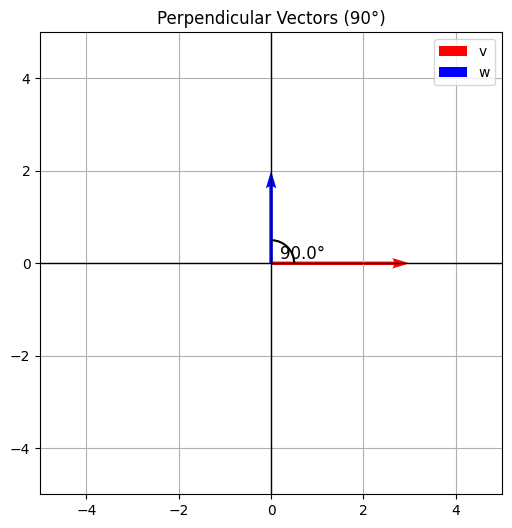

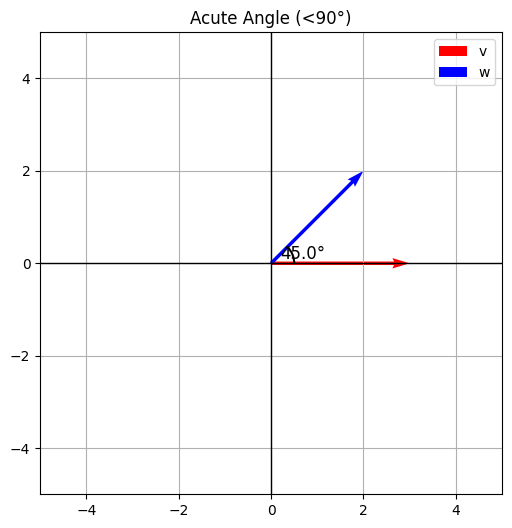

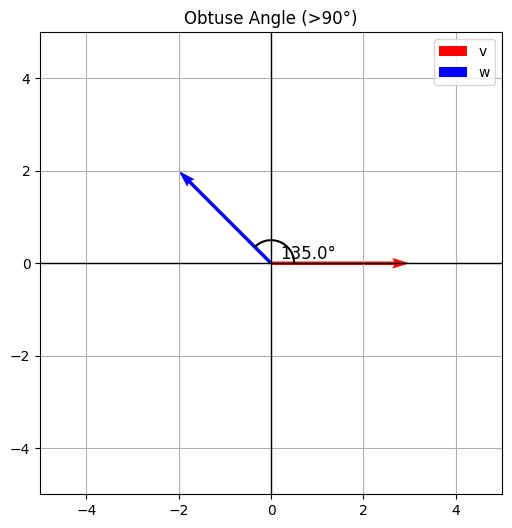

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_vectors(v, w, title=""):
    origin = np.array([0, 0])

    plt.figure(figsize=(6,6))
    
    # Plot vectors
    plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color='r', label='v')
    plt.quiver(*origin, *w, angles='xy', scale_units='xy', scale=1, color='b', label='w')
    
    # Draw angle arc
    from matplotlib.patches import Arc
    angle = np.degrees(np.arccos(np.dot(v, w)/(np.linalg.norm(v)*np.linalg.norm(w))))
    arc = Arc((0,0), 1.0, 1.0, theta1=0, theta2=angle, color='k', lw=1.5)
    plt.gca().add_patch(arc)
    plt.text(0.2, 0.1, f"{angle:.1f}°", fontsize=12)

    # Plot settings
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid(True)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.legend()
    plt.title(title)
    plt.gca().set_aspect('equal')
    plt.show()


# Perpendicular vectors (right angle)
v1 = np.array([3, 0])
w1 = np.array([0, 2])
plot_vectors(v1, w1, title="Perpendicular Vectors (90°)")

# Acute angle
v2 = np.array([3, 0])
w2 = np.array([2, 2])
plot_vectors(v2, w2, title="Acute Angle (<90°)")

# Obtuse angle
v3 = np.array([3, 0])
w3 = np.array([-2, 2])
plot_vectors(v3, w3, title="Obtuse Angle (>90°)")


### **Unit Vectors**

- For unit vectors **u** and **U**, the dot product **u · U** is the **cosine of the angle θ**:

$$
u \cdot U = \cos \theta
$$

- Geometric interpretation:
  - **u · U > 0** → θ < 90° (vectors point generally in the same direction)  
  - **u · U < 0** → θ > 90° (vectors point more away from each other)  
  - **u · U = 0** → θ = 90° (vectors are perpendicular)

- Cosine values are always between **−1 and 1**, so:

$$
|u \cdot U| \leq 1
$$


### **Non-Unit Vectors**

- If **v** and **w** are not unit vectors, convert them to unit vectors:

$$
u = \frac{v}{\|v\|}, \quad U = \frac{w}{\|w\|}
$$

- Then:

$$
\cos \theta = u \cdot U = \frac{v \cdot w}{\|v\| \, \|w\|}
$$

- This is the **cosine formula** for the angle between two nonzero vectors.


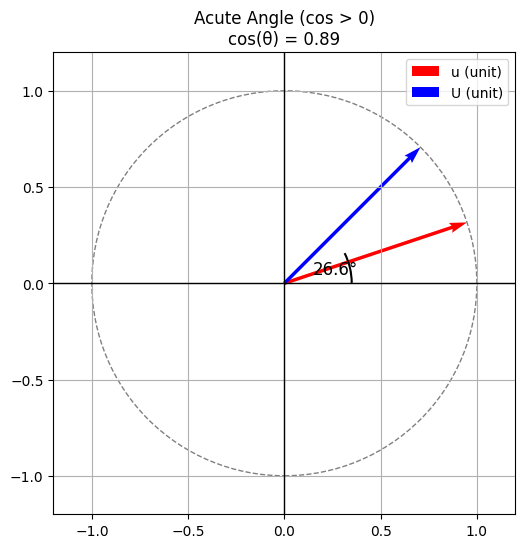

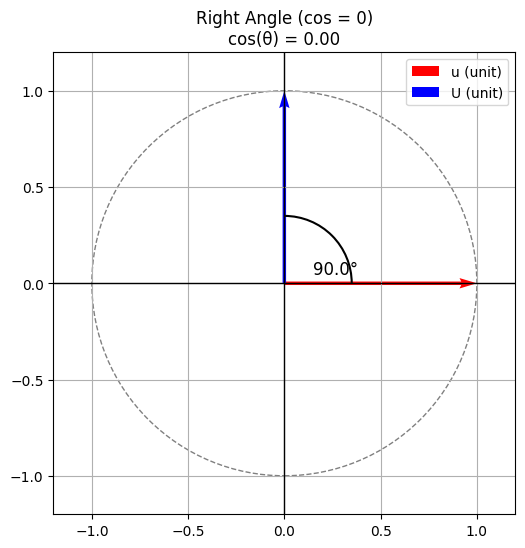

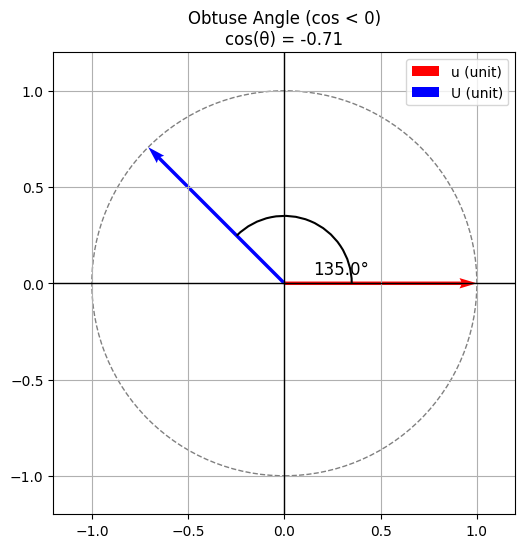

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_unit_vectors(v, w, title=""):
    # Normalize vectors to unit vectors
    u = v / np.linalg.norm(v)
    U = w / np.linalg.norm(w)
    
    origin = np.array([0, 0])
    
    plt.figure(figsize=(6,6))
    
    # Plot unit vectors
    plt.quiver(*origin, *u, angles='xy', scale_units='xy', scale=1, color='r', label='u (unit)')
    plt.quiver(*origin, *U, angles='xy', scale_units='xy', scale=1, color='b', label='U (unit)')
    
    # Compute angle
    cos_theta = np.dot(u, U)
    angle = np.degrees(np.arccos(cos_theta))
    
    # Draw angle arc
    from matplotlib.patches import Arc
    arc = Arc((0,0), 0.7, 0.7, theta1=0, theta2=angle, color='k', lw=1.5)
    plt.gca().add_patch(arc)
    plt.text(0.15, 0.05, f"{angle:.1f}°", fontsize=12)
    
    # Plot unit circle for reference
    circle = plt.Circle((0,0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_patch(circle)
    
    # Plot settings
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)
    plt.grid(True)
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.legend()
    plt.title(title + f"\ncos(θ) = {cos_theta:.2f}")
    plt.gca().set_aspect('equal')
    plt.show()


# Acute angle
v1 = np.array([3, 1])
w1 = np.array([2, 2])
plot_unit_vectors(v1, w1, title="Acute Angle (cos > 0)")

# Right angle
v2 = np.array([1, 0])
w2 = np.array([0, 1])
plot_unit_vectors(v2, w2, title="Right Angle (cos = 0)")

# Obtuse angle
v3 = np.array([1, 0])
w3 = np.array([-1, 1])
plot_unit_vectors(v3, w3, title="Obtuse Angle (cos < 0)")


### **Inequalities**

- **Cauchy–Schwarz Inequality:**

$$
|v \cdot w| \leq \|v\| \, \|w\|
$$

- **Triangle Inequality:**

$$
\|v + w\| \leq \|v\| + \|w\|
$$


**Note**

- The dot product is **commutative**: $v \cdot w = w \cdot v$
- The **length of vectors** is connected to the **Pythagorean theorem** in any dimension:  
  - 2D → standard right triangle  
  - 3D → 3D Pythagorean theorem  
  - 4D, 5D, … → generalized n-dimensional Pythagorean  
- There are **infinitely many unit vectors** on a unit circle, sphere, or hypersphere:  
  - In 2D, infinitely many combinations of $\cos \theta$ and $\sin \theta$ produce unit vectors.

      
**Key Ideas**

1. The **dot product** $v \cdot w$ multiplies each component $v_i$ by $w_i$ and sums them:

$$
v \cdot w = v_1 w_1 + v_2 w_2 + \dots + v_n w_n
$$

2. The **length** $\|v\|$ is the square root of $v \cdot v$.  
   A **unit vector** is:

$$
u = \frac{v}{\|v\|}, \quad \|u\| = 1
$$

3. The dot product is **zero** when vectors are perpendicular:

$$
v \cdot w = 0 \implies \text{v ⊥ w}
$$

4. The **cosine of θ** (angle between any nonzero vectors $v$ and $w$) never exceeds 1:

$$
\cos \theta = \frac{v \cdot w}{\|v\| \, \|w\|}, \quad |v \cdot w| \leq \|v\| \, \|w\|
$$